# Superdense Coding 

from what we understand in the theoretical perspective of Superdense codeing allows to communicate from one sender  to another sending 2 classical bits of information by transferring only smaller no of qubits 
often referred to as Alice and Bob in this context, which share a pair of maximally entangled qubits, and allows Alice to transmit two bits that is  one of (00, 01, 10 or 11) to Bob by sending only one qubit.


In [118]:
from qiskit import QuantumCircuit,ClassicalRegister,transpile,QuantumRegister
import numpy as np
from qiskit.visualization import plot_histogram 

In [119]:
c="1"
d="0"

qc=QuantumCircuit(2)

# Create entangled pair for superdense coding between qubit 0 (Alice) and qubit 1 (Bob)
qc.h(0)
qc.cx(0,1)
qc.barrier()


if d=="1":
    qc.z(0)
if c=="1":
    qc.x(0)

qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)), clbits=())

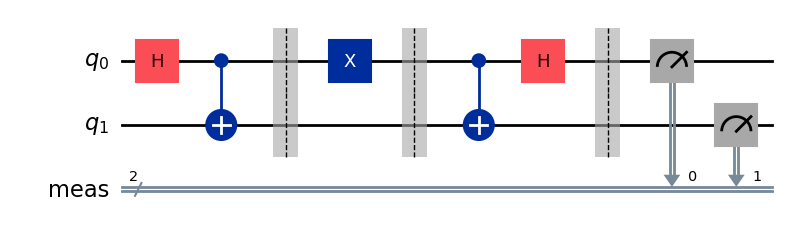

In [120]:
#bob decoding the alice message 
qc.cx(0,1)
qc.h(0)

#Measure 
qc.measure_all()


display(qc.draw("mpl"))



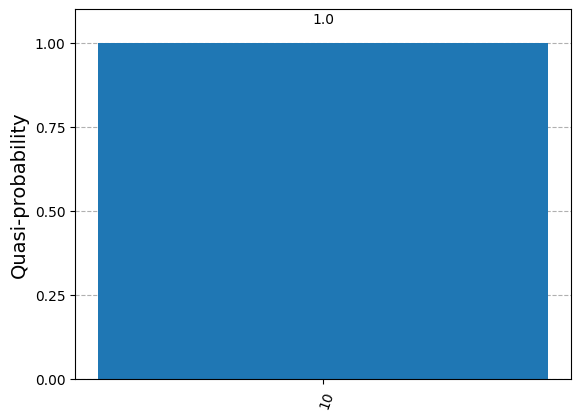

In [121]:
from qiskit_aer.primitives import Sampler
result=Sampler().run(qc).result()
stat=result.quasi_dists[0].binary_probabilities()


display(plot_histogram(stat))


introduction to Bell Basis in order to understand Bell Basis
Bell Basis is a mathematical concept that is used to describe the relationship between different states of a quantum system
It is a fundamental concept in quantum mechanics and is used to describe the correlations between different states of a
quantum system

Bell pairs or Bell state describes the four entangled two qubit quantum states also known to be as Bell states 
two of the bell states given an equal superposition state that is when measured 50% chance of either |0> or |1> state


In [122]:
# Now let us implement a random bit generator 
Q=QuantumRegister(1,"randomizer")
A = QuantumRegister(1, "A")  # Alice's entangled qubit
B = QuantumRegister(1, "B")  # Bob's entangled qubit
alice_c = ClassicalRegister(1, "c")  # Alice's first classical bit
alice_d = ClassicalRegister(1, "d")
bob_c=ClassicalRegister(1, "Bob_c")  # Bob's first classical bit
bob_d = ClassicalRegister(1, "Bob_d")  # Bob's second classical bit

test_circuit=QuantumCircuit(Q,A,B,alice_c,alice_d,bob_c,bob_d)

test_circuit.h(A)
test_circuit.cx(A,B)
test_circuit.barrier()


#use Randomizer bits
test_circuit.h(Q)
test_circuit.measure(Q,alice_c)
test_circuit.h(Q)
test_circuit.measure(Q,alice_d)

test_circuit.barrier()


CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'randomizer'), 0), Qubit(QuantumRegister(1, 'A'), 0), Qubit(QuantumRegister(1, 'B'), 0)), clbits=())

In [123]:
random_bits=np.random.randint(0,4)
msg=f"{random_bits:02b}"


#ALice operation 
if msg=="00":
    pass
elif msg=="01":
    test_circuit.z(A)
elif msg=="10":
    test_circuit.x(A)
elif msg=="11":
    test_circuit.z(A)
    test_circuit.x(A)

test_circuit.barrier()



#bobs decoding
test_circuit.cx(A,B)
test_circuit.h(A)
test_circuit.barrier()

#measure bob circuit
test_circuit.measure(A, bob_c)
test_circuit.measure(B, bob_d)


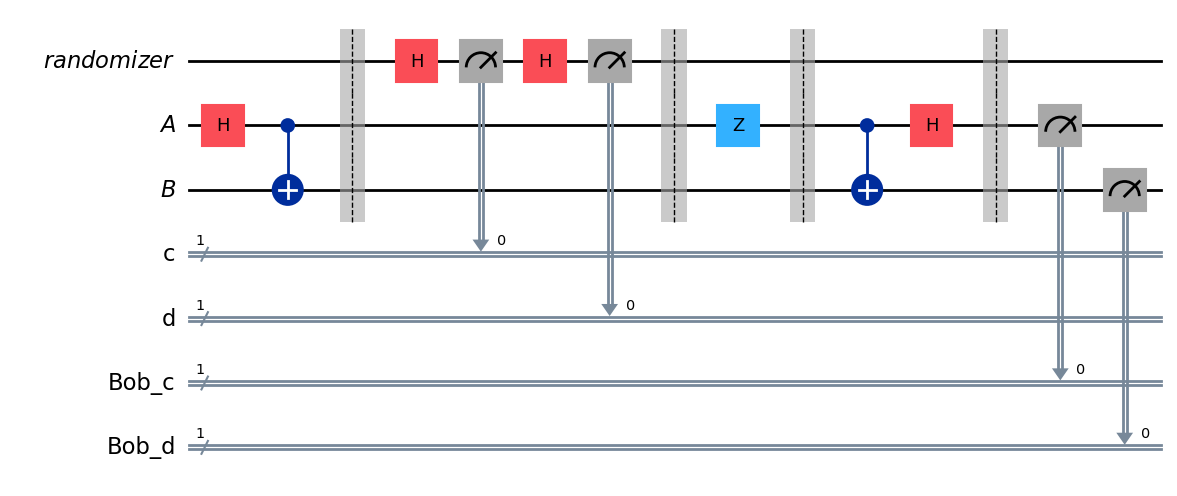

In [124]:
display(test_circuit.draw("mpl"))

Message to be sent: 01
Measurement results: {'0 1 0 0': 251, '0 1 1 1': 259, '0 1 1 0': 267, '0 1 0 1': 247}


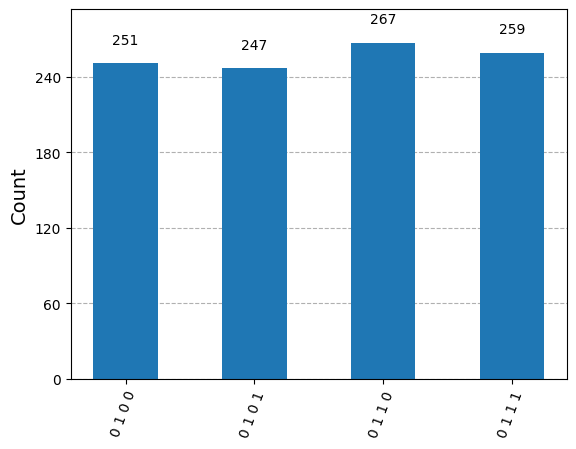

In [125]:
from qiskit_aer import AerSimulator
# Execute the circuit on the AerSimulator
simulator = AerSimulator()

result = simulator.run(test_circuit).result()
statistics = result.get_counts()


# Display the measurement results
print(f"Message to be sent: {msg}")
print("Measurement results:", statistics)

# Plot the measurement results

display(plot_histogram(statistics))

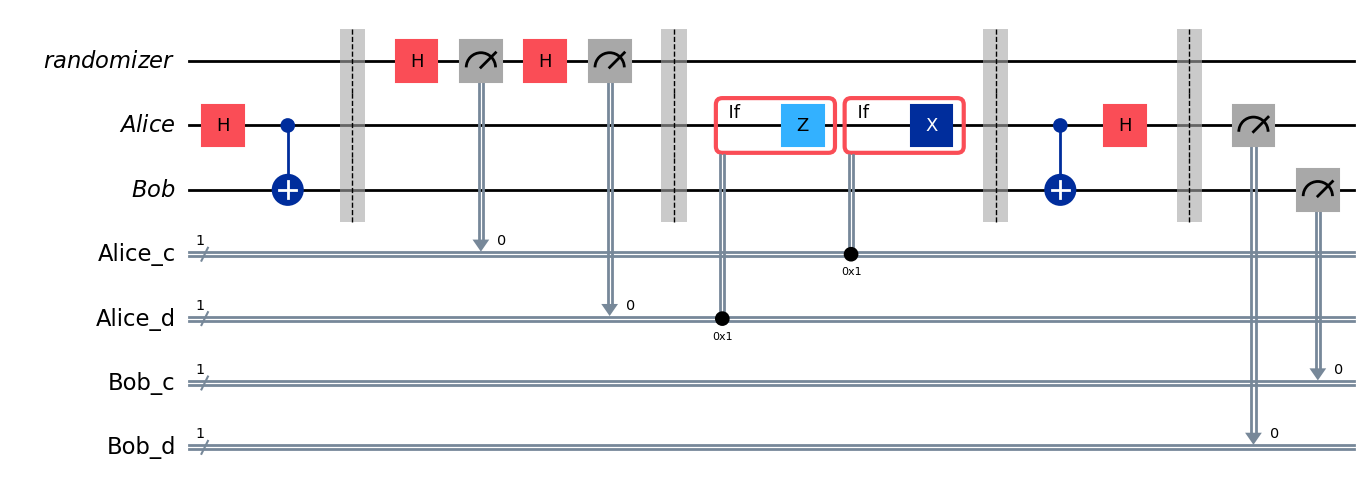

In [128]:

#reference code 

import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister


# Step 1: Set up registers
randomizer = QuantumRegister(1, "randomizer")  # Qubit for random bit generation
Alice = QuantumRegister(1, "Alice")  # Alice's entangled qubit
Bob = QuantumRegister(1, "Bob")  # Bob's entangled qubit
Alice_c = ClassicalRegister(1, "Alice_c")  # Alice's first classical bit
Alice_d = ClassicalRegister(1, "Alice_d")  # Alice's second classical bit
Bob_c = ClassicalRegister(1, "Bob_c")  # Bob's first classical bit
Bob_d = ClassicalRegister(1, "Bob_d")  # Bob's second classical bit

# Step 2: Initialize the circuit
test_circuit = QuantumCircuit(randomizer, Alice, Bob, Alice_c, Alice_d)

# Step 3: Create an entangled pair between Alice and Bob
test_circuit.h(Alice)
test_circuit.cx(Alice, Bob)
test_circuit.barrier()

# Step 4: Random bit generation and measurement
test_circuit.h(randomizer)
test_circuit.measure(randomizer, Alice_c)  # Randomly generate Alice's first bit
test_circuit.h(randomizer)
test_circuit.measure(randomizer, Alice_d)  # Randomly generate Alice's second bit
test_circuit.barrier()

# Step 5: Alice's operations based on random bits
ebit0 = Alice[0]
with test_circuit.if_test((Alice_d, 1), label="Z"):
    test_circuit.z(ebit0)
with test_circuit.if_test((Alice_c, 1), label="X"):
    test_circuit.x(ebit0)
test_circuit.barrier()

# Step 6: Bob's decoding
ebit1 = Bob[0]
test_circuit.cx(ebit0, ebit1)
test_circuit.h(ebit0)
test_circuit.barrier()

# Step 7: Measure Bob's qubits
test_circuit.add_register(Bob_c)
test_circuit.add_register(Bob_d)
test_circuit.measure(ebit0, Bob_d)
test_circuit.measure(ebit1, Bob_c)

# Display the circuit
display(test_circuit.draw(output='mpl'))
